In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
import seaborn as sns

In [3]:
data = pd.read_csv('DataAnalytics.csv')
data.head(5)

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


# Limpieza de datos nulos

In [4]:
data_cuanti=data.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data.select_dtypes(include=["object","datetime","category","datetime64[ns]"])

cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuanti.fillna(method="ffill")

data = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data

/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98065/3559288621.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98065/3559288621.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuanti.fillna(method="ffill")


,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,1.0,5.399169,1.0,0.0,0.000000,0.000000
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,0.0,1.283400,2.0,0.0,0.000000,0.000000
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,1.0,2.700226,3.0,0.0,0.000000,0.000000
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,0.0,3.050262,4.0,0.0,0.000000,0.000000
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,0.0,4.750256,5.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1.0,7.099429,4.0,0.0,7.461668,332.240000
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,0.0,2.135419,1.0,0.0,0.000000,0.000000
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,0.0,2.135419,1.0,0.0,2.271806,0.000000
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,0.0,2.135419,1.0,0.0,2.271806,6.478299


In [5]:
nulos=data.isnull().sum().sum()
nulos

0

# Limpieza de outliers

In [6]:
cuantitativas=data.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,1.0,5.399169,1.0,0.0,0.000000,0.000000
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,0.0,1.283400,2.0,0.0,0.000000,0.000000
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,1.0,2.700226,3.0,0.0,0.000000,0.000000
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,0.0,3.050262,4.0,0.0,0.000000,0.000000
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,0.0,4.750256,5.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1.0,7.099429,4.0,0.0,7.461668,332.240000
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,0.0,2.135419,1.0,0.0,0.000000,0.000000
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,0.0,2.135419,1.0,0.0,2.271806,0.000000
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,0.0,2.135419,1.0,0.0,2.271806,6.478299


# Convertir variables categóricas ordinales en numéricas

In [7]:
#Administrador
frecuencia_ad = data["Administrador"].value_counts().reset_index()
frecuencia_ad.columns = ["Administrador", "Frecuencia"]
frecuencia_ad

KeyError: 'Administrador'

In [ ]:
data["Administrador"]=data["Administrador"].str.replace("ALEIDA","1")
data["Administrador"]=data["Administrador"].str.replace("nicolas","2")
data["Administrador"]=data["Administrador"].str.replace("LEONARDO","3")
data["Administrador"]=data["Administrador"].str.replace("DENISSE","4")
data["Administrador"]=data["Administrador"].str.replace("SERGIO ANGEL","5")
data["Administrador"]=data["Administrador"].str.replace("CARLOS ENRIQUE","6")
data["Administrador"]=data["Administrador"].str.replace("YAEL DAVID","7")
data["Administrador"]=data["Administrador"].str.replace("AUSTIN","8")
data["Administrador"]=data["Administrador"].str.replace("VALENTIN","9")
data["Administrador"]=data["Administrador"].str.replace("erick","10")
data["Administrador"]=data["Administrador"].str.replace("IKER BENJAMIN","11")
data["Administrador"]=data["Administrador"].str.replace("KYTZIA","12")
data["Administrador"]=data["Administrador"].str.replace("BENJAMIN","13")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,2,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,2,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,2,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,2,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,ESMERALDA,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,1,JOSE JAVIER,0.0,2.135419,Asteroides,1.0,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,1,JOSE JAVIER,NaN,NaN,Asteroides,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,1,JOSE JAVIER,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [ ]:
#Usuario
#(ADRIAN, ALEIDA, ARLETT, ASHLEY, AUSTIN)
frecuencia_us = data["Usuario"].value_counts().reset_index()
frecuencia_us.columns = ["Usuario", "Frecuencia"]
frecuencia_us

,Usuario,Frecuencia
0,LEONARDO,546
1,ALEIDA,487
2,nicolas,440
3,JOSE JAVIER,394
4,LEONARDO,371
5,JESUS ALEJANDRO,356
6,ramiro isai,332
7,ADRIAN,280
8,SERGIO ANGEL,243
9,DENISSE,228


In [ ]:

data["Usuario"]=data["Usuario"].str.replace("LEONARDO","0")
data["Usuario"]=data["Usuario"].str.replace("ALEIDA","1")
data["Usuario"]=data["Usuario"].str.replace("nicolas","0")
data["Usuario"]=data["Usuario"].str.replace("JOSE JAVIER","0")
data["Usuario"]=data["Usuario"].str.replace("JESUS ALEJANDRO","0")
data["Usuario"]=data["Usuario"].str.replace("ramiro isai","0")
data["Usuario"]=data["Usuario"].str.replace("ADRIAN","2")
data["Usuario"]=data["Usuario"].str.replace("SERGIO ANGEL","0")
data["Usuario"]=data["Usuario"].str.replace("DENISSE","0")
data["Usuario"]=data["Usuario"].str.replace("CARLOS ENRIQUE","0")
data["Usuario"]=data["Usuario"].str.replace("YAEL DAVID","0")
data["Usuario"]=data["Usuario"].str.replace("VALENTIN","0")
data["Usuario"]=data["Usuario"].str.replace("erick","0")
data["Usuario"]=data["Usuario"].str.replace("IKER BENJAMIN","0")
data["Usuario"]=data["Usuario"].str.replace("NICOLAS |","0")
data["Usuario"]=data["Usuario"].str.replace("ERICK OSVALDO","0")
data["Usuario"]=data["Usuario"].str.replace("CONCEPCION","0")
data["Usuario"]=data["Usuario"].str.replace("KYTZIA","0")
data["Usuario"]=data["Usuario"].str.replace("AUSTIN","3")
data["Usuario"]=data["Usuario"].str.replace("JOSE IGNACIO TADEO","0")
data["Usuario"]=data["Usuario"].str.replace("JOSE IAN","0")
data["Usuario"]=data["Usuario"].str.replace("ASHLEY","4")
data["Usuario"]=data["Usuario"].str.replace("JOSHUA","0")
data["Usuario"]=data["Usuario"].str.replace("YEREMI YAZMIN","0")
data["Usuario"]=data["Usuario"].str.replace("MA DEL ROSARIO","0")
data["Usuario"]=data["Usuario"].str.replace("BENJAMIN","0")
data["Usuario"]=data["Usuario"].str.replace("INGRID	","0")
data["Usuario"]=data["Usuario"].str.replace("RENE","0")
data["Usuario"]=data["Usuario"].str.replace("CARLOS ABEL","0")
data["Usuario"]=data["Usuario"].str.replace("ARLETT","5")
data["Usuario"]=data["Usuario"].str.replace("ESMERALDA","0")
data["Usuario"]=data["Usuario"].str.replace("IRVING","0")
data["Usuario"]=data["Usuario"].str.replace("jesus eduardo","0")
data


,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,2,0,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,2,0,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,2,0,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,2,0,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,1,0,0.0,2.135419,Asteroides,1.0,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,1,0,NaN,NaN,Asteroides,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [ ]:
#Mini juego
frecuencia_mj = data["mini juego"].value_counts().reset_index()
frecuencia_mj.columns = ["mini juego", "Frecuencia"]
frecuencia_mj

,mini juego,Frecuencia
0,Asteroides,1054
1,Restaurante,869
2,Estrellas,813
3,Gusanos,748
4,sonidos y animales,743
5,animales y colores,545
6,figuras y colores,400
7,partes del cuerpo,320
8,Despegue,196
9,MiniGame_0,8


In [ ]:
data["mini juego"]=data["mini juego"].str.replace("Asteroides","1")
data["mini juego"]=data["mini juego"].str.replace("Restaurante","2")
data["mini juego"]=data["mini juego"].str.replace("Estrellas","3")
data["mini juego"]=data["mini juego"].str.replace("Gusanos","4")
data["mini juego"]=data["mini juego"].str.replace("sonidos y animales","5")
data["mini juego"]=data["mini juego"].str.replace("animales y colores","6")
data["mini juego"]=data["mini juego"].str.replace("figuras y colores","7")
data["mini juego"]=data["mini juego"].str.replace("partes del cuerpo","8")
data["mini juego"]=data["mini juego"].str.replace("Despegue","9")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_0","10")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_3","11")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_2","12")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_1","13")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0,1.0,5.399169,9,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,2,0,0.0,1.283400,9,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,2,0,1.0,2.700226,9,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,2,0,0.0,3.050262,9,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,2,0,0.0,4.750256,9,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,1,0,0.0,2.135419,1,1.0,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,1,0,NaN,NaN,1,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [ ]:
#Color presionado
frecuencia_co = data["color presionado"].value_counts().reset_index()
frecuencia_co.columns = ["color presionado", "Frecuencia"]
frecuencia_co

,color presionado,Frecuencia
0,violet,1361
1,green,1298
2,yellow,1233
3,blue,1182
4,red,29


In [ ]:
data["color presionado"]=data["color presionado"].str.replace("violet","1")
data["color presionado"]=data["color presionado"].str.replace("green","2")
data["color presionado"]=data["color presionado"].str.replace("yellow","3")
data["color presionado"]=data["color presionado"].str.replace("blue","4")
data["color presionado"]=data["color presionado"].str.replace("red","5")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0,1.0,5.399169,9,1.0,4,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,2,0,0.0,1.283400,9,2.0,1,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,2,0,1.0,2.700226,9,3.0,2,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,2,0,0.0,3.050262,9,4.0,2,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,2,0,0.0,4.750256,9,5.0,2,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,1,0,0.0,2.135419,1,1.0,2,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,1,0,NaN,NaN,1,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,1,0,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [ ]:
#Dificultad
frecuencia_di = data["dificultad"].value_counts().reset_index()
frecuencia_di.columns = ["dificultad", "Frecuencia"]
frecuencia_di

,dificultad,Frecuencia
0,Episodio 1,2357
1,Episodio 2,1493
2,Episodio 3,1292
3,Episodio 4,723


In [ ]:
data["dificultad"]=data["dificultad"].str.replace("Episodio 1","1")
data["dificultad"]=data["dificultad"].str.replace("Episodio 2","2")
data["dificultad"]=data["dificultad"].str.replace("Episodio 3","3")
data["dificultad"]=data["dificultad"].str.replace("Episodio 4","4")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0,1.0,5.399169,9,1.0,4,1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,2,0,0.0,1.283400,9,2.0,1,1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,2,0,1.0,2.700226,9,3.0,2,1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,2,0,0.0,3.050262,9,4.0,2,1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,2,0,0.0,4.750256,9,5.0,2,1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0,NaN,NaN,NaN,NaN,NaN,1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,1,0,0.0,2.135419,1,1.0,2,3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,1,0,NaN,NaN,1,NaN,NaN,3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,1,0,NaN,NaN,NaN,NaN,NaN,3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [ ]:
#Juego
frecuencia_ju = data["Juego"].value_counts().reset_index()
frecuencia_ju.columns = ["Juego", "Frecuencia"]
frecuencia_ju

,Juego,Frecuencia
0,Astro,3799
1,Cadetes,2066


In [ ]:
data["Juego"]=data["Juego"].str.replace("Astro","1")
data["Juego"]=data["Juego"].str.replace("Cadetes","2")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0,1.0,5.399169,9,1.0,4,1,25/01/2024 09:26:42 a. m.,1,0.0,0.000000,0.000000
1,2,0,0.0,1.283400,9,2.0,1,1,25/01/2024 09:26:46 a. m.,1,0.0,0.000000,0.000000
2,2,0,1.0,2.700226,9,3.0,2,1,25/01/2024 09:26:48 a. m.,1,0.0,0.000000,0.000000
3,2,0,0.0,3.050262,9,4.0,2,1,25/01/2024 09:26:57 a. m.,1,0.0,0.000000,0.000000
4,2,0,0.0,4.750256,9,5.0,2,1,25/01/2024 09:26:58 a. m.,1,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0,NaN,NaN,NaN,NaN,NaN,1,28/05/2024 04:15:49 p. m.,1,NaN,NaN,332.240000
5861,1,0,0.0,2.135419,1,1.0,2,3,04/06/2024 11:09:54 a. m.,1,0.0,0.000000,0.000000
5862,1,0,NaN,NaN,1,NaN,NaN,3,04/06/2024 11:09:58 a. m.,1,NaN,2.271806,NaN
5863,1,0,NaN,NaN,NaN,NaN,NaN,3,04/06/2024 11:09:58 a. m.,1,NaN,NaN,6.478299


In [ ]:
data = data.apply(pd.to_numeric, errors="coerce")
data

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,2,0.0,1.0,5.399169,9.0,1.0,4.0,1,NaN,1,0.0,0.000000,0.000000
1,2,0.0,0.0,1.283400,9.0,2.0,1.0,1,NaN,1,0.0,0.000000,0.000000
2,2,0.0,1.0,2.700226,9.0,3.0,2.0,1,NaN,1,0.0,0.000000,0.000000
3,2,0.0,0.0,3.050262,9.0,4.0,2.0,1,NaN,1,0.0,0.000000,0.000000
4,2,0.0,0.0,4.750256,9.0,5.0,2.0,1,NaN,1,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,332.240000
5861,1,0.0,0.0,2.135419,1.0,1.0,2.0,3,NaN,1,0.0,0.000000,0.000000
5862,1,0.0,NaN,NaN,1.0,NaN,NaN,3,NaN,1,NaN,2.271806,NaN
5863,1,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,6.478299


# Analizar las correlaciones lineales (Heatmap) entre "Usuario" con respecto a las demás

In [ ]:
data=data.drop(["fecha"],axis=1)
data=data.drop(["auto push"],axis=1)

In [ ]:
aleida = 1
adrian = 2
austin = 3
ashley = 4
arlett = 5
ALEIDA = data[data["Usuario"] == aleida]
ADRIAN = data[data["Usuario"] == adrian]
AUSTIN = data[data["Usuario"] == austin]
ASHLEY = data[data["Usuario"] == ashley]
ARLETT = data[data["Usuario"] == arlett]


In [ ]:
Corr_Factors=ALEIDA.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ALEIDA=sns.heatmap(Corr_Factors1,cmap="magma")
Heat_Map_ALEIDA

NameError: name 'ALEIDA' is not defined

Las mayores correlaciones fueron: mini juego - Juego | mini juego - dificulatad

<Axes: >

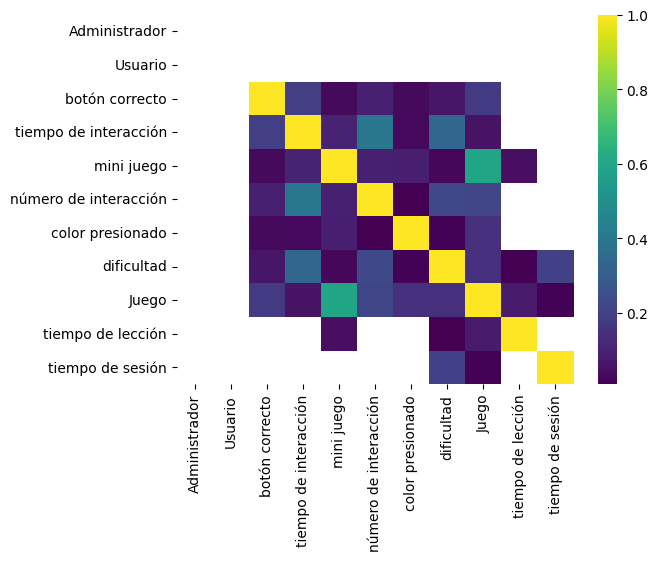

In [ ]:
Corr_Factors=ADRIAN.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ADRIAN=sns.heatmap(Corr_Factors1,cmap="magma")
Heat_Map_ADRIAN

Las mayores correlaciones fueron: mini juego - Juego. Seguido de cerca por: tiempo de interacción - dificulatad | tiempo de interacción - número de interacción.

<Axes: >

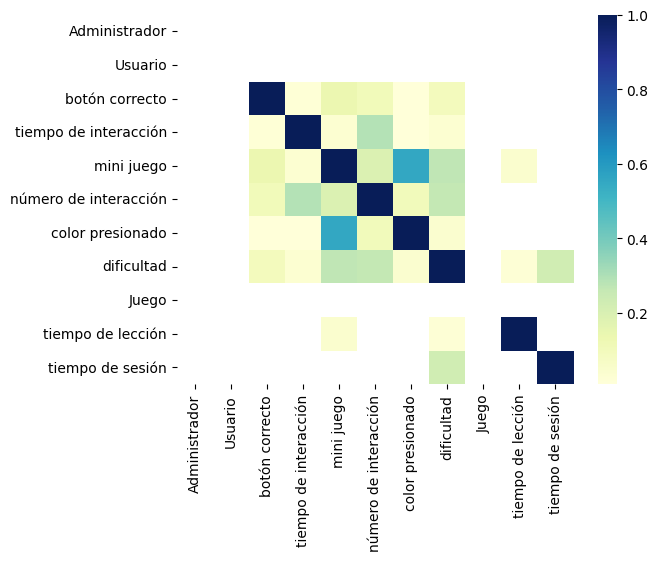

In [ ]:
Corr_Factors=AUSTIN.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_AUSTIN=sns.heatmap(Corr_Factors1,cmap="magma")
Heat_Map_AUSTIN

La mayor correlación fue: mini juego - color presionado.

<Axes: >

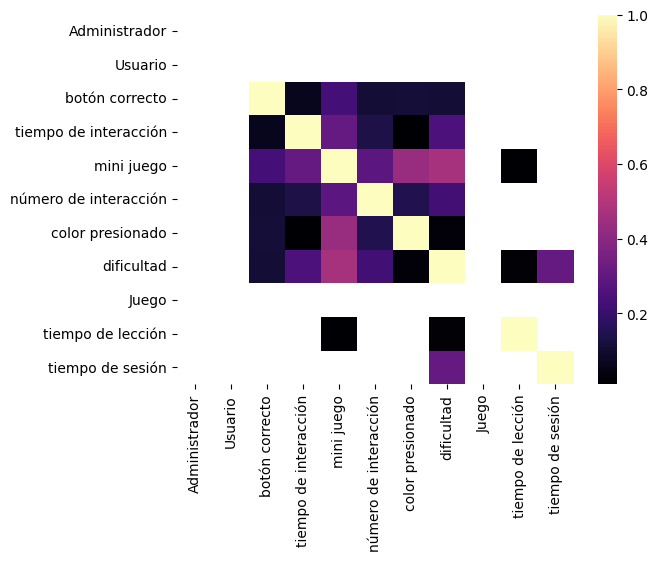

In [ ]:
Corr_Factors=ASHLEY.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ASHLEY=sns.heatmap(Corr_Factors1,cmap="magma")
Heat_Map_ASHLEY

La mayor correlación fue: mini juego - dificultad. Seguido de cerca por: mini juego - color presionado.

<Axes: >

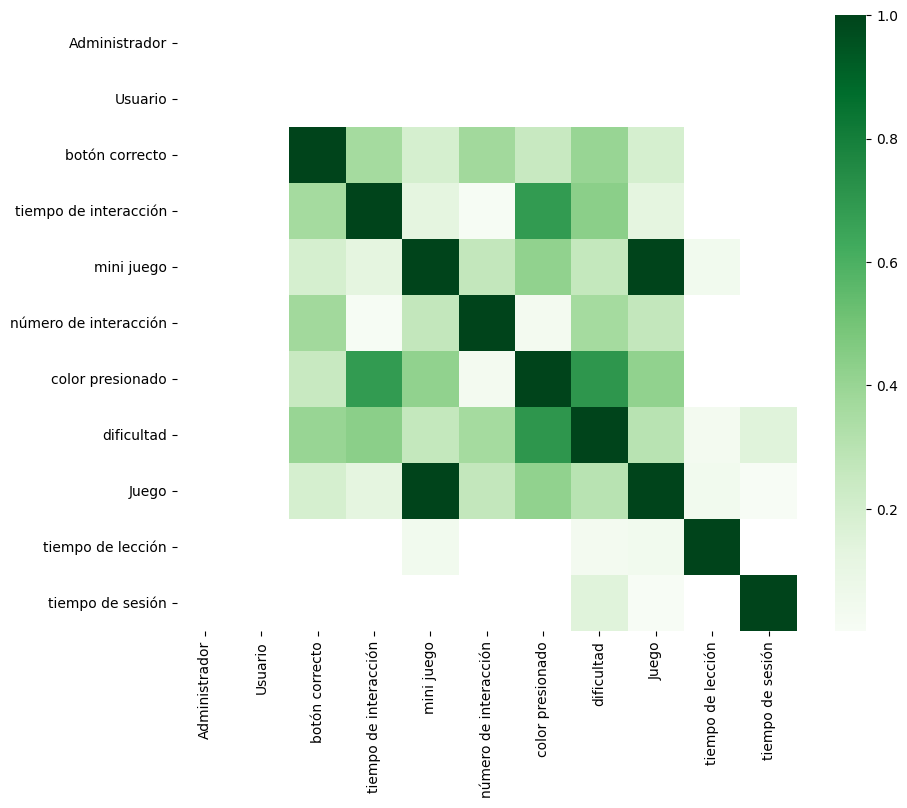

In [ ]:
Corr_Factors=ARLETT.corr()
Corr_Factors1=abs(Corr_Factors)
plt.figure(figsize=(10, 8))
Heat_Map_ARLETT=sns.heatmap(Corr_Factors1,cmap="Greens")
Heat_Map_ARLETT

La mayor correlación fue: mini juego - Juego.

# Encontrar un modelo lineal múltiple que supere la mejor correlación lineal simple encontrada

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
Vars_Indep= data[["Administrador","botón correcto","tiempo de interacción","mini juego","número de interacción","color presionado","dificultad","Juego","tiempo de lección","tiempo de sesión"]]
Var_Dep= data["Usuario"]

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_Dep)

0.04340781015367373

In [ ]:
y_pred= model.predict(X=data[["Administrador","botón correcto","tiempo de interacción","mini juego","número de interacción","color presionado","dificultad","Juego","tiempo de lección","tiempo de sesión"]])
y_pred

array([[0.1764414 , 0.1661737 ],
       [0.13375036, 0.12205942],
       [0.17103028, 0.15973203],
       ...,
       [0.48120367, 0.48437231],
       [0.35135285, 0.35838487],
       [0.27281783, 0.260057  ]])

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de Determinación",coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de Correlación",coef_Correl)

Coeficiente de Determinación 0.04340781015367373
Coeficiente de Correlación 0.2083454106854138


Al parecer los coeficientes no salieron muy altos como para superar a las correlaciones simples. Esto puede indicar que las variables realmente no aportan un valor real para predecir respecto al usuario.